# 1. Importing Libraries

In [2]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 75.7 MB/s eta 0:00:00


In [3]:
# ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 Reading Data

In [6]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_BRCpofr.csv')
train_data

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [7]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_koRSKBP.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


# unvariant analysis

In [8]:
import sweetviz as sv
sweetviz_report = sv.analyze(train_data)
sweetviz_report.show_html('train_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report train_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


1. area, income, policy,num_polices, marital_status and claim_amount have high correlation

2. Num_polices has two categories morethan1 and 1. 

3. more than type_of_policy , policy are correlative to cltv

4. Multicollinearity is visble in the dataset with claim_amount

5. id we need to keep as in submission file we need to sumbit it.

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


#Bivariant analysis

area
Rural       NaN
Urban    3672.0
Name: cltv, dtype: float64

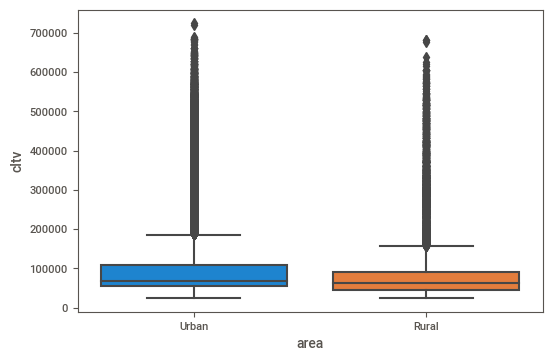

In [10]:
# area vs cltv
sns.boxplot(x='area', y='cltv', data=train_data)
train_data.groupby(by = ['area'])['cltv'].median().diff()


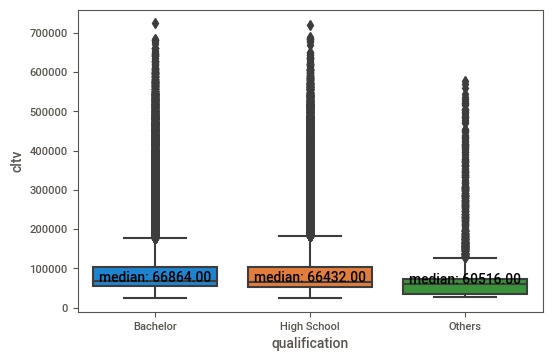

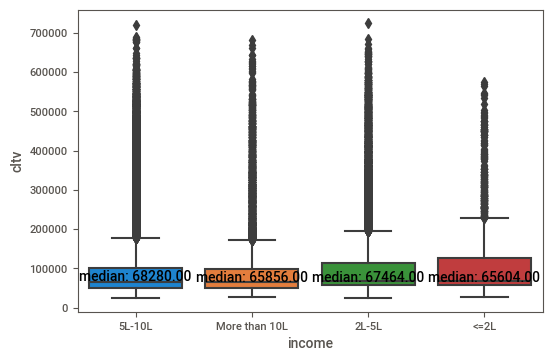

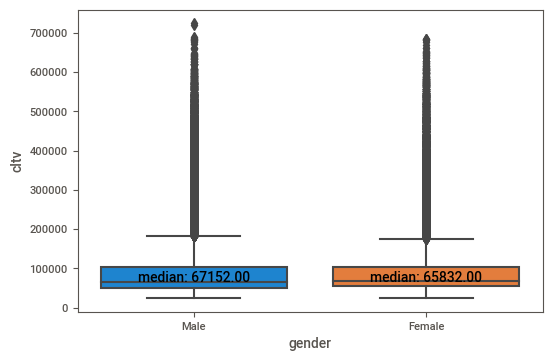

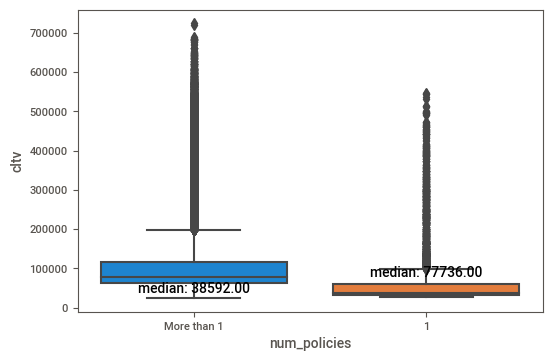

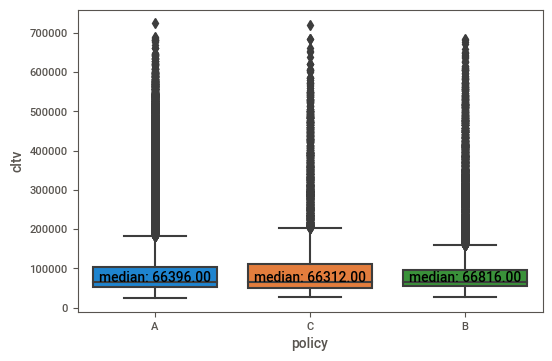

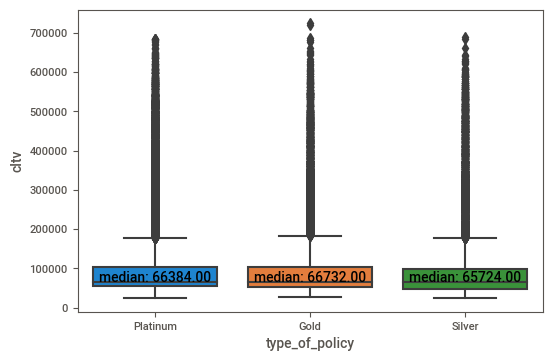

In [11]:
for i in ['qualification', 'income', 'gender','num_policies', 'policy', 'type_of_policy']:
  ax = sns.boxplot(x=i, y='cltv', data=train_data)
  # calculate the mean and median of the 'total_bill' column for each category of the 'day' column
  grouped_data = train_data.groupby(i)['cltv'].median()

  # add the mean and median labels to the box plot
  for i in range(len(grouped_data)):
      ax.text(i, grouped_data[i] + 5, 'median: {:.2f}'.format(grouped_data[i]), horizontalalignment='center', color='black')
  plt.show()

1. bachalore + high qualification have higher
2. more than 1 policy 
3. 5-10 L salary person more
4. platinum customer higher but, gold has higher outlier value

In [12]:
train_data.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

# Pycaret import

In [13]:
!pip3 install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [15]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


# model

In [16]:
from pycaret.regression import *
cat_f = ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']

['id', 'marital_status', 'claim_amount', 'area_Urban',
       'qualification_Others', 'income_5L-10L', 'income_More than 10L',
       'num_policies_More than 1', 'policy_B', 'policy_C']

In [17]:
exp_reg101 = setup(data =train_data, target = 'cltv', categorical_features = cat_f,
                   normalize = True,session_id = 123,transformation = True, 
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,123
1,Target,cltv
2,Original Data,"(89392, 12)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(62574, 27)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['gender', 'area',
                                                            'qualification',
                                                            'income',
                                                            'num_policies',
                                                            'policy',
                                                            'type_of_policy'],
                                      display_types=True, features_todrop=[],
                                      id_columns=['id'],
                                      ml_usecase='regression',
                                      numerical_features=[], target='cltv',
                                      time_features=[])),
                ('imputer',
                 Simple_Impu

In [18]:
# all the models that are available are 
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [19]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,50683.1482,6.949467e+09,83348.3432,0.1586,0.5672,0.5493,5.075
lightgbm,Light Gradient Boosting Machine,50735.4112,6.984592e+09,83558.8401,0.1543,0.5684,0.5495,0.464
llar,Lasso Least Angle Regression,51708.3661,7.014188e+09,83735.0376,0.1508,0.5849,0.5698,0.073
lr,Linear Regression,51795.0314,7.014484e+09,83736.8542,0.1507,0.5869,0.5713,0.455
lasso,Lasso Regression,51792.0144,7.014427e+09,83736.5075,0.1507,0.5869,0.5713,0.641
ridge,Ridge Regression,51792.6270,7.014439e+09,83736.5822,0.1507,0.5869,0.5713,0.060
lar,Least Angle Regression,51792.9841,7.014440e+09,83736.5874,0.1507,0.5869,0.5713,0.089
br,Bayesian Ridge,51781.3058,7.014419e+09,83736.4528,0.1507,0.5868,0.5712,0.182
omp,Orthogonal Matching Pursuit,51682.5313,7.058259e+09,83997.0992,0.1454,0.5810,0.5637,0.071
en,Elastic Net,53628.7474,7.486572e+09,86509.0179,0.0936,0.6363,0.6571,0.071


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## Gradient Boosting Regressor

In [20]:
gbr = create_model('gbr')

INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [21]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50403.7610,6.863463e+09,82846.0227,0.1454,0.5906,0.5918
1,51033.5983,7.182134e+09,84747.4746,0.1442,0.5900,0.5869
2,50835.8705,6.888409e+09,82996.4406,0.1433,0.5874,0.5837
3,50233.4899,6.812137e+09,82535.6689,0.1420,0.5888,0.5909
4,51551.4591,7.225906e+09,85005.3289,0.1409,0.5899,0.5875
5,51606.6460,7.062338e+09,84037.7151,0.1331,0.5923,0.5897
6,50503.0825,6.707008e+09,81896.3228,0.1471,0.5909,0.6008
7,51144.8415,7.087284e+09,84186.0072,0.1403,0.5927,0.5908
8,51785.9831,7.527165e+09,86759.2364,0.1366,0.5946,0.5876


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [22]:
#on_unseen_data
predict_model(tuned_gbr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,50798.194,6.930107e+09,83247.2661,0.1441,0.5893,0.5892


,claim_amount,gender_Female,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,...,vintage_8,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,cltv,Label
0,-0.623411,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,337800,99772.116793
1,0.554798,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,30528,67835.671150
2,0.465886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,60468,70520.597797
3,1.492807,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,150600,137196.859886
4,0.762615,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,59184,118490.732541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26813,-1.555608,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,61464,65988.103090
26814,0.641416,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,112032,121938.906410
26815,1.254391,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,173688,116897.901616
26816,0.419192,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,127392,114595.576067


## Light Gradient Boosting Machine

In [23]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,49667.7360,6.761433e+09,82227.9335,0.1581,0.5628,0.5431
1,50579.9779,7.062171e+09,84036.7237,0.1585,0.5664,0.5452
2,50463.7964,6.800505e+09,82465.1732,0.1543,0.5661,0.5447
3,49990.3050,6.736598e+09,82076.7827,0.1515,0.5661,0.5510
4,51368.7643,7.079068e+09,84137.1974,0.1584,0.5702,0.5551
5,51439.8516,6.969556e+09,83483.8677,0.1444,0.5732,0.5552
6,49932.8877,6.583032e+09,81135.8830,0.1628,0.5661,0.5579
7,50893.5359,7.009801e+09,83724.5528,0.1497,0.5718,0.5532
8,51347.3678,7.390685e+09,85969.0933,0.1523,0.5711,0.5479


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 6
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [24]:
tuned_lightgbm= tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,49594.8625,6.716416e+09,81953.7421,0.1638,0.5618,0.5439
1,50508.6383,7.032294e+09,83858.7728,0.1620,0.5651,0.5448
2,50451.9196,6.756111e+09,82195.5679,0.1598,0.5647,0.5458
3,49893.4053,6.691554e+09,81801.9205,0.1572,0.5643,0.5509
4,51156.6285,7.052050e+09,83976.4860,0.1616,0.5678,0.5515
5,51294.4748,6.943437e+09,83327.2869,0.1477,0.5718,0.5537
6,49732.2171,6.559924e+09,80993.3602,0.1658,0.5634,0.5534
7,50702.7664,6.946314e+09,83344.5488,0.1574,0.5691,0.5509
8,51368.1076,7.371020e+09,85854.6450,0.1545,0.5707,0.5484


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 7
INFO:logs:LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [25]:
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,50307.7002,6.791744e+09,82412.0389,0.1612,0.5651,0.5487


,claim_amount,gender_Female,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,...,vintage_8,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,cltv,Label
0,-0.623411,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,337800,101326.346720
1,0.554798,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,30528,53046.968683
2,0.465886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,60468,50352.548783
3,1.492807,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,150600,149450.321274
4,0.762615,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,59184,133244.814693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26813,-1.555608,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,61464,49302.834550
26814,0.641416,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,112032,132421.015784
26815,1.254391,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,173688,122592.679312
26816,0.419192,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,127392,125829.345011


## lr

In [26]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50731.5188,6.775257e+09,82311.9481,0.1564,0.5815,0.5649
1,51587.6272,7.102118e+09,84274.0642,0.1537,0.5847,0.5663
2,51500.8360,6.808619e+09,82514.3553,0.1533,0.5832,0.5664
3,50944.3368,6.749909e+09,82157.8307,0.1498,0.5842,0.5714
4,52409.5568,7.148925e+09,84551.3145,0.1501,0.5878,0.5745
5,52431.4347,7.003707e+09,83688.1509,0.1403,0.5904,0.5773
6,51053.4729,6.626528e+09,81403.4874,0.1573,0.5847,0.5805
7,51737.4136,7.012253e+09,83739.1952,0.1494,0.5871,0.5716
8,52594.7779,7.448853e+09,86306.7374,0.1456,0.5935,0.5724


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 9
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


In [27]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50731.4918,6.775257e+09,82311.9491,0.1564,0.5815,0.5649
1,51587.6300,7.102118e+09,84274.0648,0.1537,0.5847,0.5663
2,51500.8211,6.808619e+09,82514.3557,0.1533,0.5832,0.5664
3,50937.7665,6.749904e+09,82157.8012,0.1498,0.5843,0.5713
4,52409.5555,7.148925e+09,84551.3145,0.1501,0.5878,0.5745
5,52431.4499,7.003707e+09,83688.1511,0.1403,0.5904,0.5773
6,51039.5153,6.626098e+09,81400.8495,0.1573,0.5846,0.5802
7,51737.4250,7.012253e+09,83739.1951,0.1494,0.5871,0.5716
8,52594.7752,7.448853e+09,86306.7374,0.1456,0.5935,0.5724


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 10
INFO:logs:LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)
INFO:logs:tune_model() succesfully completed......................................


In [28]:
predict_model(tuned_lr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,51466.3102,6.861025e+09,82831.3026,0.1526,0.5849,0.5712


,claim_amount,gender_Female,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,...,vintage_8,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,cltv,Label
0,-0.623411,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,337800,106696.406250
1,0.554798,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,30528,65945.710938
2,0.465886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,60468,42465.718750
3,1.492807,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,150600,137955.125000
4,0.762615,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,59184,127030.656250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26813,-1.555608,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,61464,35952.687500
26814,0.641416,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,112032,130916.148438
26815,1.254391,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,173688,116952.289062
26816,0.419192,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,127392,124764.007812


## llar	

In [29]:
llar= create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50638.3716,6.772427e+09,82294.7562,0.1568,0.5794,0.5633
1,51507.8236,7.104288e+09,84286.9394,0.1535,0.5829,0.5648
2,51428.1418,6.810622e+09,82526.4923,0.1530,0.5813,0.5651
3,50852.1726,6.747584e+09,82143.6789,0.1501,0.5822,0.5699
4,52325.9353,7.150190e+09,84558.7948,0.1499,0.5859,0.5730
5,52350.1517,7.003179e+09,83685.0011,0.1403,0.5885,0.5759
6,50958.4201,6.625449e+09,81396.8615,0.1574,0.5826,0.5787
7,51663.1323,7.011771e+09,83736.3163,0.1495,0.5853,0.5702
8,52499.0788,7.448577e+09,86305.1375,0.1456,0.5912,0.5706


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 12
INFO:logs:LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=123, verbose=False)
INFO:logs:create_model() succesfully completed......................................


In [30]:
tuned_llar = tune_model(llar)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50638.3716,6.772427e+09,82294.7562,0.1568,0.5794,0.5633
1,51507.8236,7.104288e+09,84286.9394,0.1535,0.5829,0.5648
2,51428.1418,6.810622e+09,82526.4923,0.1530,0.5813,0.5651
3,50852.1726,6.747584e+09,82143.6789,0.1501,0.5822,0.5699
4,52325.9353,7.150190e+09,84558.7948,0.1499,0.5859,0.5730
5,52350.1517,7.003179e+09,83685.0011,0.1403,0.5885,0.5759
6,50958.4201,6.625449e+09,81396.8615,0.1574,0.5826,0.5787
7,51663.1323,7.011771e+09,83736.3163,0.1495,0.5853,0.5702
8,52499.0788,7.448577e+09,86305.1375,0.1456,0.5912,0.5706


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 13
INFO:logs:LassoLars(alpha=1.0, copy_X=True, eps=0.02, fit_intercept=True, fit_path=True,
          jitter=None, max_iter=500, normalize=True, positive=False,
          precompute='auto', random_state=123, verbose=False)
INFO:logs:tune_model() succesfully completed......................................


In [31]:
predict_model(tuned_llar)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LassoLars(alpha=1.0, copy_X=True, eps=0.02, fit_intercept=True, fit_path=True,
          jitter=None, max_iter=500, normalize=True, positive=False,
          precompute='auto', random_state=123, verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,51375.0628,6.861317e+09,82833.0655,0.1526,0.5828,0.5697


,claim_amount,gender_Female,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,...,vintage_8,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,cltv,Label
0,-0.623411,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,337800,106649.751627
1,0.554798,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,30528,65766.571872
2,0.465886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,60468,45306.279601
3,1.492807,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,150600,137801.948378
4,0.762615,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,59184,126433.137133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26813,-1.555608,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,61464,37522.618026
26814,0.641416,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,112032,130702.319255
26815,1.254391,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,173688,118862.832968
26816,0.419192,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,127392,123426.419453


# Final Model

In [36]:
tuned_lightgbm_final = finalize_model(tuned_lightgbm)



INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples

In [37]:
predict_model(tuned_lightgbm_final)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,49994.692,6.730081e+09,82037.0716,0.1688,0.5616,0.544


,claim_amount,gender_Female,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,...,vintage_8,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,cltv,Label
0,-0.623411,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,337800,107395.064613
1,0.554798,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,30528,52892.721246
2,0.465886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,60468,47443.667557
3,1.492807,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,150600,150051.181994
4,0.762615,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,59184,129126.728214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26813,-1.555608,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,61464,49164.531092
26814,0.641416,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,112032,132849.760955
26815,1.254391,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,173688,123080.046080
26816,0.419192,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,127392,123198.124896


# Test_data

In [39]:
unseen_predictions = predict_model(tuned_lightgbm_final, data=test_data)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,Label
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver,91073.163635
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum,132760.894579
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold,97643.573001
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver,84852.768984
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver,130017.072737


In [41]:
pred_sumbit = pd.DataFrame(data={"id":unseen_predictions["id"],"cltv":unseen_predictions["Label"]})
pred_sumbit.to_csv('predict_lightgbm.csv',mode = 'w', index=False)